In [86]:
!pip install wfdb
!pip install matplotlib numpy
!pip install --upgrade wfdb
!pip install numpy==2.0.0
import os
os.environ['NPY_PROMOTION_STATE'] = 'weak_and_warn'
import numpy
numpy.__version__


^C


'2.1.2'

  Using cached numpy-2.0.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 598.5 kB/s eta 0:00:27
   - -------------------------------------- 0.8/16.2 MB 762.0 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/16.2 MB 882.6 kB/s eta 0:00:18
   --- ------------------------------------ 1.3/16.2 MB 958.5 kB/s eta 0:00:16
   --- ------------------------------------ 1.3/16.2 M

In [88]:
!pip install numpy==2.0.0


  Using cached numpy-2.0.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 837.5 kB/s eta 0:00:19
   - -------------------------------------- 0.5/16.2 MB 837.5 kB/s eta 0:00:19
   - -------------------------------------- 0.8/16.2 MB 882.6 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/16.2 MB 967.3 kB/s eta 0:00:16
   -- ------------------------------------- 1.0/16.2 MB 967.3 kB/s eta 0:00:16
   -- ------------------------------------- 1.0/16.2 MB 967.3 kB/s eta 0:00:16
   --- ------------------------------------ 1.3/16.2 MB 713.8 kB/s eta 0:00:21
   --- --------------------

+


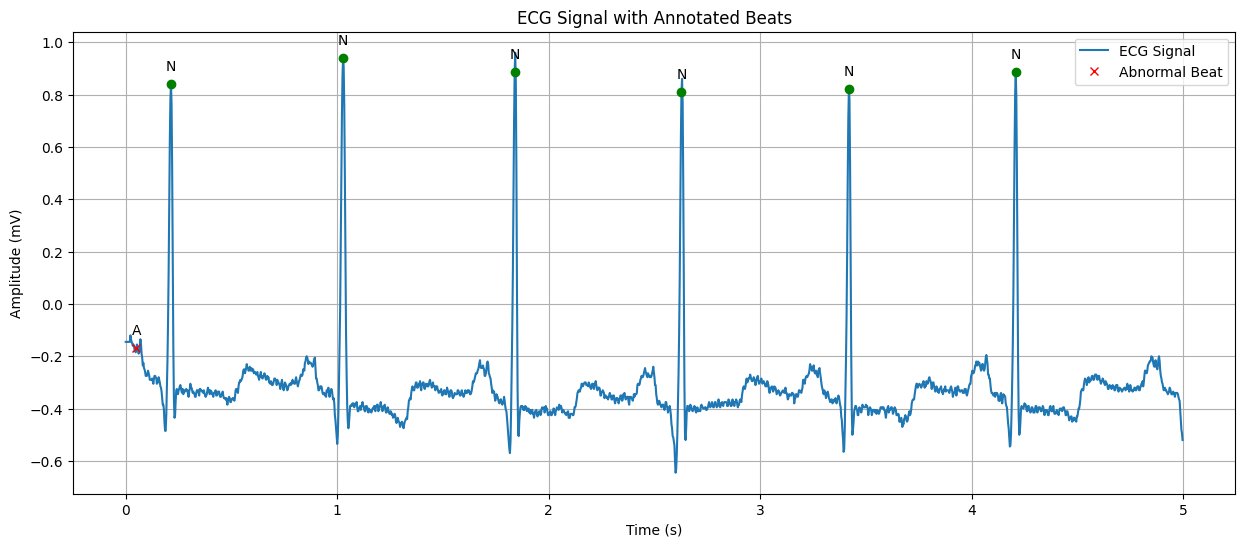

In [22]:
import wfdb
import matplotlib.pyplot as plt
import wfdb.processing

data_directory = 'mit-bih-arrhythmia-database-1.0.0/'
record_name = '100'
record = wfdb.rdrecord(f'{data_directory}{record_name}', sampto=3000)

# Read annotations
annotation = wfdb.rdann(f'{data_directory}{record_name}', 'atr')

fs = record.fs  # Sampling frequency
signal = record.p_signal[:5 * fs, 0]  # Taking the first 5 seconds (first channel)
time = [i / fs for i in range(len(signal))]
rpeaks = wfdb.processing.xqrs_detect(signal, fs=fs, verbose=False)

# Plot the ECG signal
plt.figure(figsize=(15, 6))
plt.plot(time, signal, label='ECG Signal')

for i, (sample, symbol) in enumerate(zip(annotation.sample, annotation.symbol)):
    if sample < len(signal):
        if symbol == 'N':  # Normal beat
            plt.plot(sample / fs, signal[sample], 'go', label='Normal Beat' if i == 0 else "")
            plt.annotate('N', (sample / fs, signal[sample]), textcoords="offset points", xytext=(0, 10), ha='center')
        else:  # Abnormal beat (e.g., 'A', 'V', etc.)
            plt.plot(sample / fs, signal[sample], 'rx', label='Abnormal Beat' if i == 0 else "")
            print(symbol)
            plt.annotate(symbol, (sample / fs, signal[sample]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('ECG Signal with Annotated Beats')
plt.legend(loc='best')
plt.grid()
plt.show()






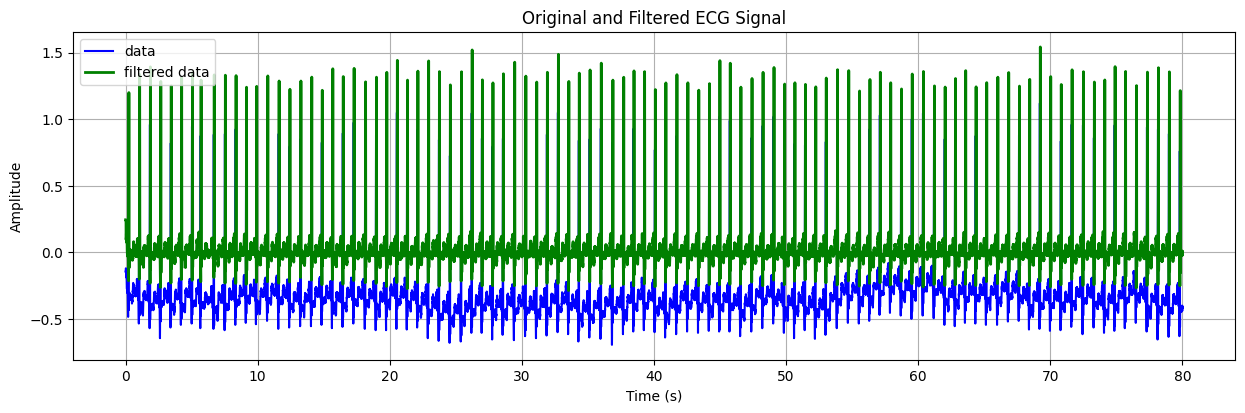

In [52]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

filtered_signal = custom_filter(signal)
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 2)
plt.plot(time, signal, 'b-', label='data')
plt.plot(time, filtered_signal, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Filtered ECG Signal')
plt.legend()
plt.grid()

plt.subplots_adjust(hspace=0.35)
plt.show()